In [1]:
import numpy as np
import torch
import cryo_em_sbi
import matplotlib.pyplot as plt

from cryo_em_sbi.simulating import image_generation
from cryo_em_sbi.utils import validate_config
import cryo_em_sbi.preprocessing as preprocessing

/home/david/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
model = torch.tensor(np.load("../models/hsp90_models.npy")[0, 0])

config = {
    "IMAGES": {"N_PIXELS": 128, "PIXEL_SIZE": 1.0, "SIGMA": 2.0},
    "SIMULATION": {
        "N_SIMULATIONS": 100,
        "MODEL_FILE": "../../models/hsp90_models.npy",
        "DEVICE": "cpu",
        "ROTATIONS": "QUAT_576",
    },
    "PREPROCESSING": {
        "SHIFT": True,
        "CTF": True,
        "NOISE": True,
        "VOLTAGE": 300,
        "DEFOCUS": [1.5, 2.5],
        "SNR": 0.1,
        "DEVICE": "cpu",
        "REDUCED_PIXELS": 64
    },
    "TRAINING": {
        "MODEL": "maf",
        "HIDDEN_FEATURES": 100,
        "NUM_TRANSFORMS": 4,
        "DEVICE": "cpu",
        "BATCH_SIZE": 1000,
        "POSTERIOR_NAME": "posterior_all_effects_noise_01.pkl",
    },
}

In [3]:
image = image_generation.gen_img(model, config["IMAGES"])

In [4]:
image_ctf = preprocessing.apply_ctf_to_dataset(
                image.reshape(1, -1),
                config["IMAGES"],
                config["PREPROCESSING"],
            )

/home/david/.local/lib/python3.10/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/Data/Documents/Research/SMBp/sim_based_inf/cryo_em_SBI/cryo_em_sbi/preprocessing/ctf.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  env = torch.exp(torch.tensor(-b_factor * freq2_2d * 0.5))
/Data/Documents/Research/SMBp/sim_based_inf/cryo_em_SBI/cryo_em_sbi/preprocessing/ctf.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  amp * torch.cos(torch.tensor(phase * fr

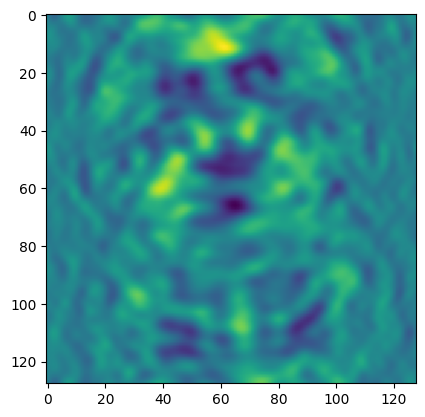

In [7]:
plt.imshow(image_ctf.reshape(128, 128))

In [5]:
import torch

In [9]:
torch.zeros(3, 3, dtype=np.complex64)

TypeError: zeros() received an invalid combination of arguments - got (int, int, dtype=type), but expected one of:
 * (tuple of ints size, *, tuple of names names, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
